In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import yfinance as yf

In [2]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [4]:
stockList = ['TSLA', 'GOOG', 'META']
stocks = [stock for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

# Monte Carlo Simulation


[*********************100%%**********************]  3 of 3 completed


In [10]:
mc_sims = 1000
T = 100
initialPortfolio = 1000

In [11]:
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
portfolio_sims = np.full(shape=(T, mc_sims), fill_value= 0.0)

In [12]:
for m in range(0, mc_sims):
    Z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+ 1)*initialPortfolio

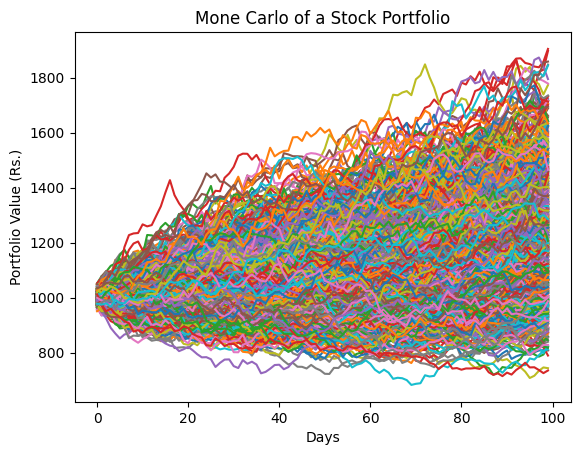

In [13]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value (Rs.)')
plt.xlabel('Days')
plt.title('Mone Carlo of a Stock Portfolio')
plt.show()

# Risk Assessment

## Value at Risk (VaR)

#### Value at Risk (VaR): Calculate the Value at Risk to understand the maximum loss you might expect over a given period at a certain confidence level.

In [14]:
portfolio_end_values = portfolio_sims[-1, :]
var_95 = np.percentile(portfolio_end_values, 5)  # 5th percentile for 95% confidence level
print(f"Value at Risk (95% confidence level): {initialPortfolio - var_95:.2f} Rs.")


Value at Risk (95% confidence level): 87.41 Rs.


## Expected Return

#### Average Portfolio Value: Calculate the average end value of the portfolio from the simulations to understand the expected return.

In [18]:
expected_return = np.mean(portfolio_end_values)
print(f"Expected Portfolio Value: {expected_return:.2f} Rs.")

Expected Portfolio Value: 1220.50 Rs.


## Probability of Loss

#### Loss Probability: Determine the probability of the portfolio ending up with less than the initial value.

In [15]:
loss_probability = np.mean(portfolio_end_values < initialPortfolio)
print(f"Probability of Loss: {loss_probability * 100:.2f}%")


Probability of Loss: 15.90%


## Confidence Intervals

#### Confidence Interval: Calculate the confidence interval for the portfolio values.

In [16]:
ci_lower = np.percentile(portfolio_end_values, 2.5)
ci_upper = np.percentile(portfolio_end_values, 97.5)
print(f"95% Confidence Interval: {ci_lower:.2f} Rs. to {ci_upper:.2f} Rs.")


95% Confidence Interval: 878.86 Rs. to 1655.71 Rs.


#### Histogram of Final Portfolio Values: Visualize the distribution of final portfolio values to understand the range of possible outcomes.

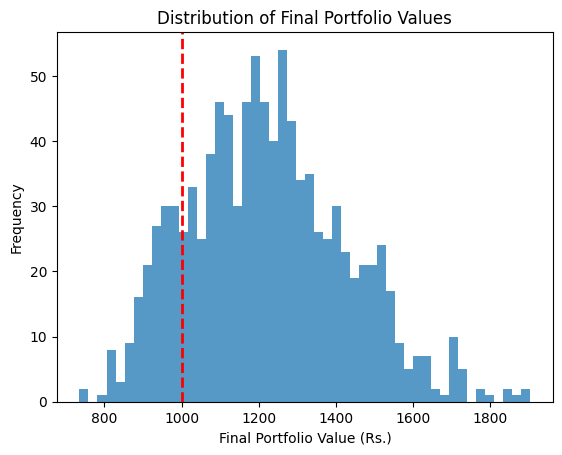

In [17]:
plt.hist(portfolio_end_values, bins=50, alpha=0.75)
plt.axvline(initialPortfolio, color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Final Portfolio Value (Rs.)')
plt.ylabel('Frequency')
plt.title('Distribution of Final Portfolio Values')
plt.show()
